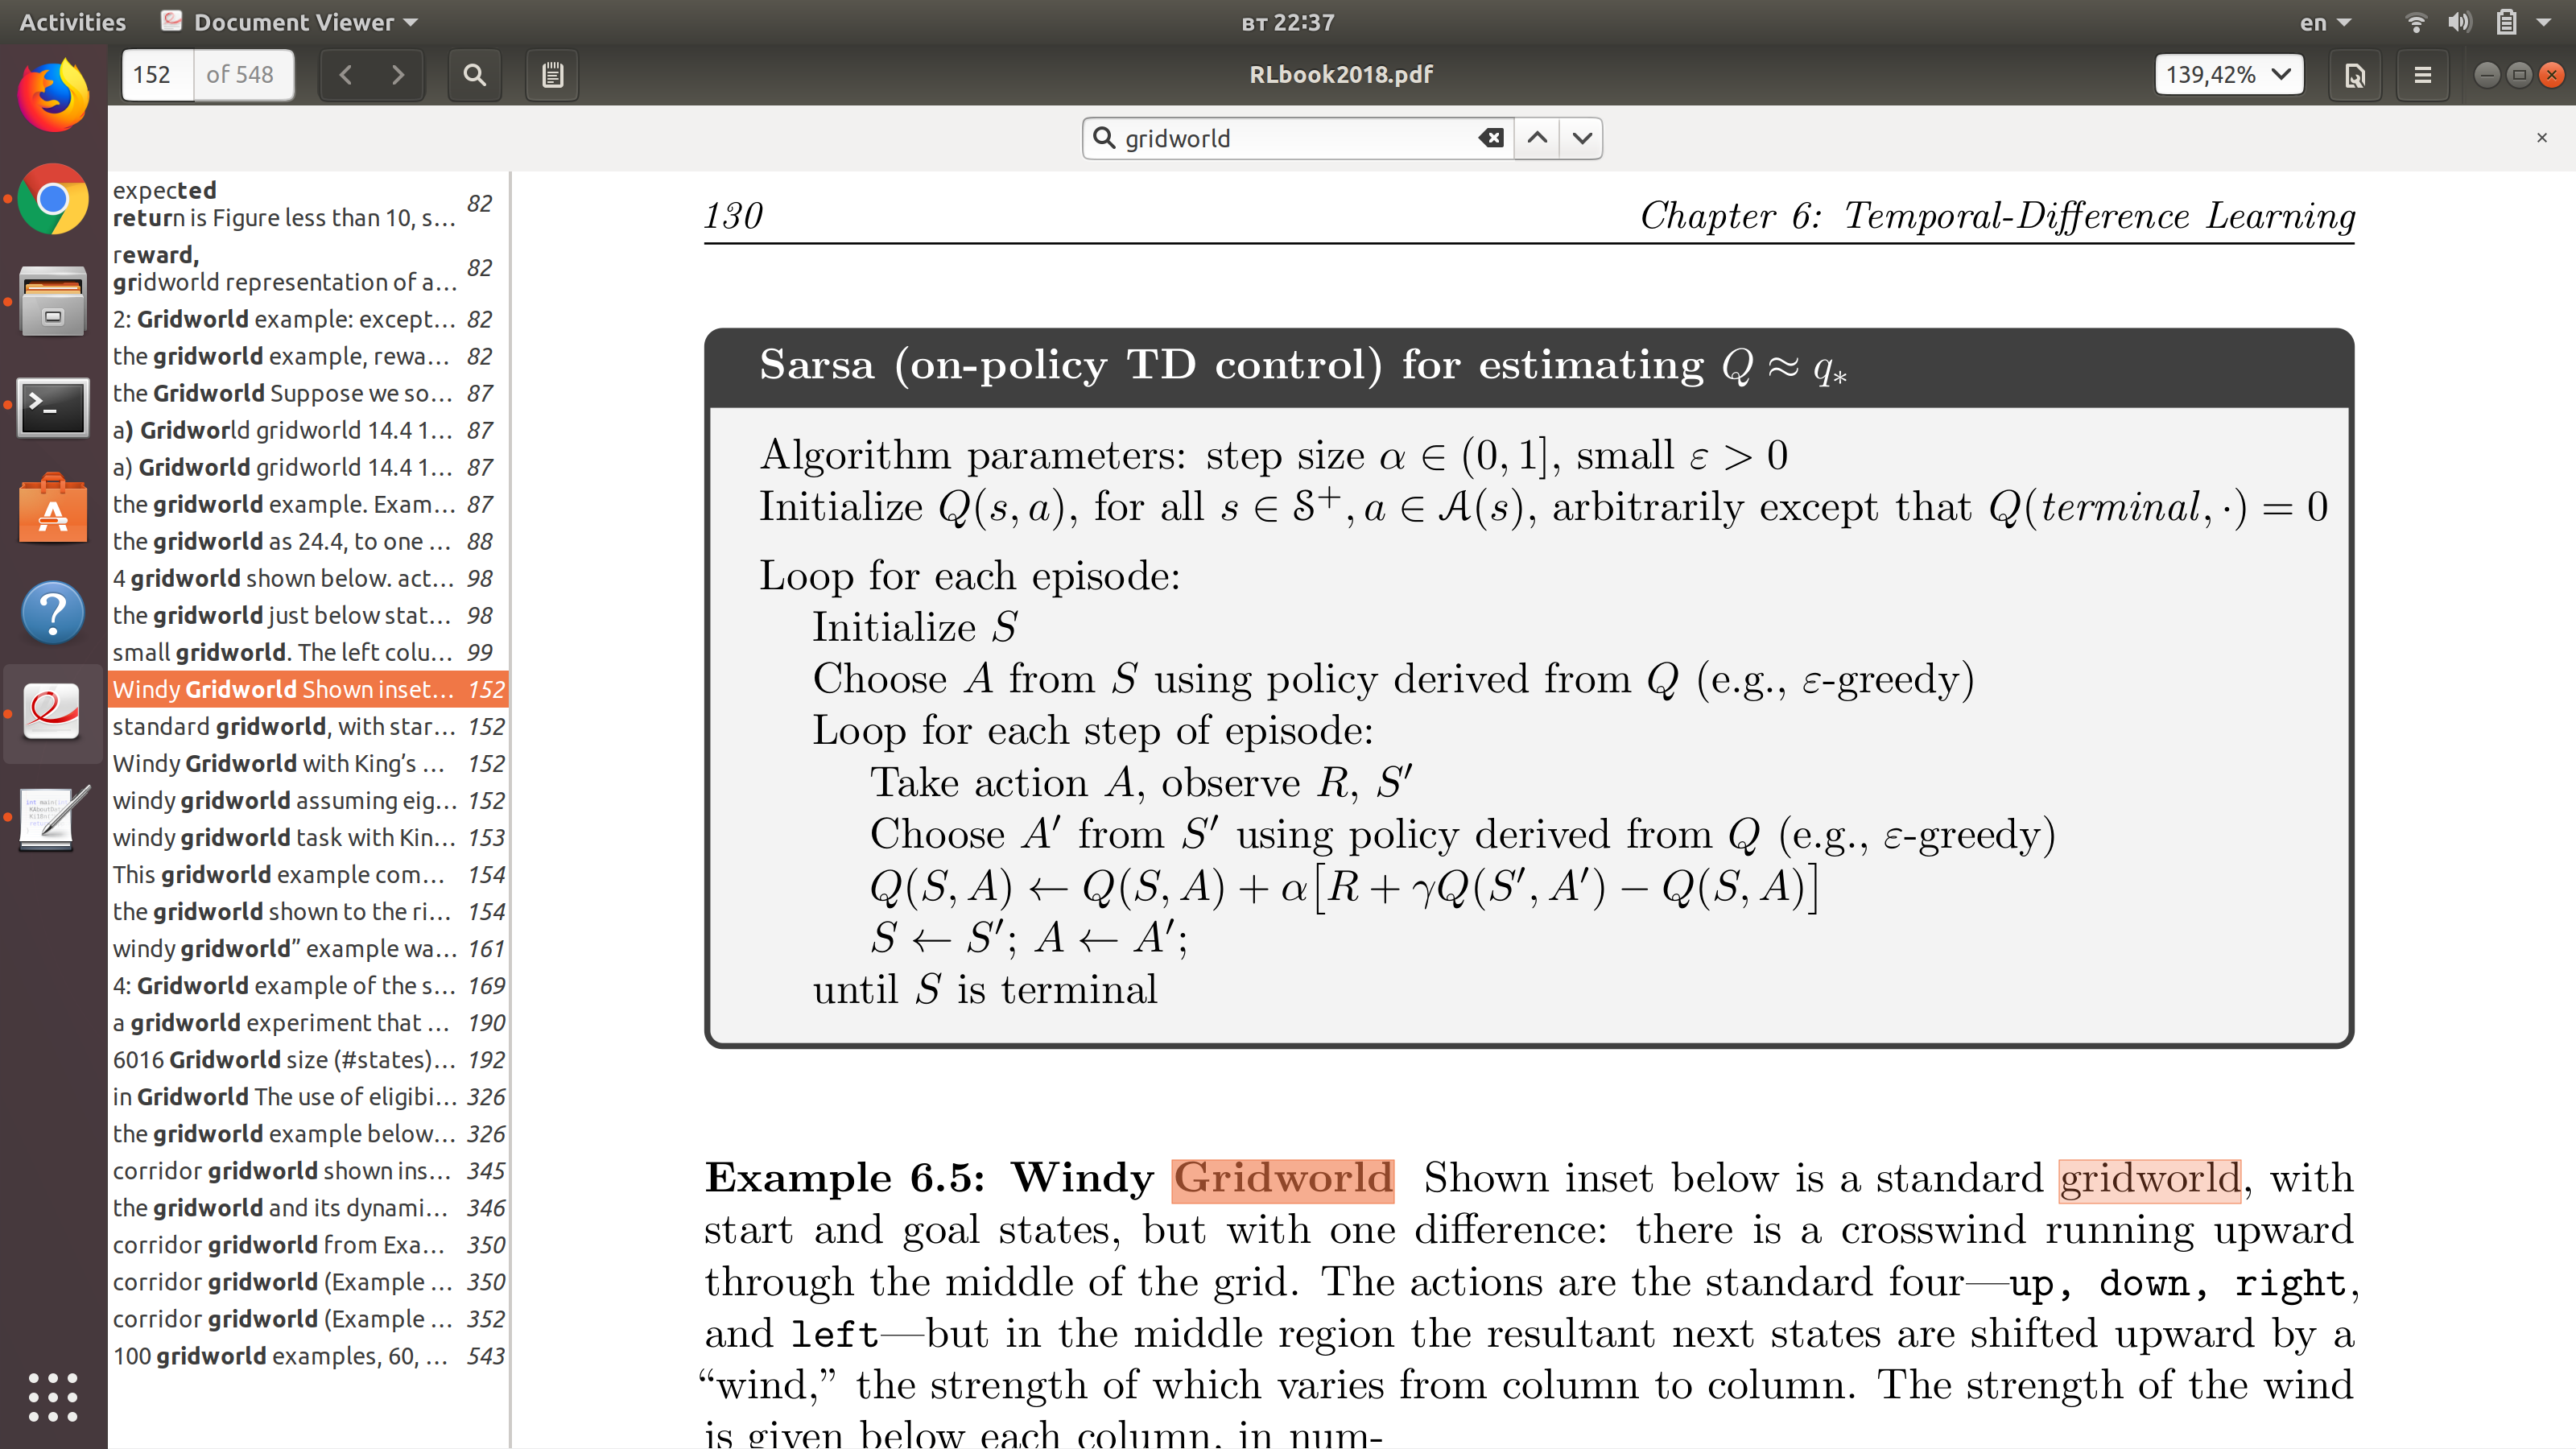

In [40]:

class State:
    def __init__(self, row=3,col=0):
        self.current_row = row
        self.current_col = col
    
    def as_tuple(self):
        return (self.current_row, self.current_col)
        
class Env:
    rows = 7
    cols = 10
    start = (3,0)
    goal = (3,7)
    wind = (0,0,0,1,1,1,2,2,1,0)
    actions = ['up', 'down', 'left', 'right']
    
    def reset(self):
        return State()
    
    def step(self, action, state):
        new_state = self.apply_action(action, state)
        if self.is_done(new_state):
            # success
            reward = 0
            
        else:
            reward = -1
        return new_state,reward
    
    def is_done(self, state):
        return state.as_tuple() == self.goal
        
    def apply_action(self, action, old_state):
        state = State(old_state.current_row, old_state.current_col)
        state.current_row = state.current_row - self.wind[state.current_col]
        if action == 'up':
            state.current_row = state.current_row - 1
        elif action == 'down':
            state.current_row = state.current_row + 1
        elif action == 'left':
            state.current_col = max(0, state.current_col - 1)
        elif action == 'right':
            state.current_col = min(self.cols - 1, state.current_col + 1)
        state.current_row = min(self.rows-1, max(0, state.current_row))
        return state
            
        
e = Env()
assert e.apply_action('up',State(3,0)).as_tuple() == (2,0)
assert e.apply_action('up',State(0,0)).as_tuple() == (0,0)
assert e.apply_action('left',State(5,0)).as_tuple() == (5,0)
assert e.apply_action('right',State(5,0)).as_tuple() == (5,1)
assert e.apply_action('right',State(6,9)).as_tuple() == (6,9)
assert e.apply_action('down',State(6,9)).as_tuple() == (6,9)
assert e.apply_action('right',State(3,3)).as_tuple() == (2,4)



In [46]:
import numpy as np
import random

ALPHA = 0.5
GAMA = 1
EPSILON = 0.1
class Agent:
        def __init__(self, env):
            self.env = env
            self.init_q()
        
        def init_q(self):
            self.q = np.random.uniform(low=-1, high=0, size=(self.env.rows, self.env.cols, len(self.env.actions)))
            
        def get_q(self, row, col, action):
            action_index = self.env.actions.index(action)
            return self.q[row,col,action_index]
        
        def set_q(self, row, col, action, value):
            action_index = self.env.actions.index(action)
            self.q[row,col,action_index] = value
          
        def act(self, state):
            if random.random() < EPSILON:
                action_index = random.randint(0,len(self.env.actions)-1)
            else:
                action_index = np.argmax(self.q[state.current_row,state.current_col])
                #print(self.q[state.current_row,state.current_col])
            return self.env.actions[action_index]
        
        def update_q(self, reward, action, next_action, state, next_state):
            q_s_a = self.get_q(state.current_row, state.current_col, action)
            q_s1_a1 = self.get_q(next_state.current_row, next_state.current_col, next_action)
            new_value = q_s_a + ALPHA*(reward + GAMA* q_s1_a1 - q_s_a)
            self.set_q(state.current_row, state.current_col, action, new_value)
            
        
        def train_episode(self):
            steps = 0
            state = self.env.reset()
            while not self.env.is_done(state):
                action = self.act(state)
                next_state, reward = self.env.step(action, state)
                next_action = self.act(next_state)
                chosen_q = self.get_q(state.current_row, state.current_col, action)
                self.update_q(reward, action, next_action, state, next_state)
                state = next_state
                steps += 1
                #print(steps, next_state.as_tuple(), chosen_q)
            return steps
                               
e = Env()
agent = Agent(e)
agent.q[3,0,0]
agent.get_q(3,0,'up')
agent.act(State(0))
e = Env()
agent = Agent(e)
agent.train_episode()

424

(0, 498)
(1, 288)
(2, 200)
(3, 268)
(4, 31)
(5, 121)
(6, 112)
(7, 79)
(8, 84)
(9, 68)
(10, 60)
(11, 160)
(12, 30)
(13, 28)
(14, 41)
(15, 35)
(16, 54)
(17, 21)
(18, 96)
(19, 67)
(20, 85)
(21, 141)
(22, 32)
(23, 30)
(24, 35)
(25, 23)
(26, 28)
(27, 43)
(28, 70)
(29, 102)
(30, 59)
(31, 47)
(32, 75)
(33, 61)
(34, 28)
(35, 54)
(36, 69)
(37, 58)
(38, 32)
(39, 37)
(40, 35)
(41, 32)
(42, 25)
(43, 63)
(44, 66)
(45, 82)
(46, 35)
(47, 51)
(48, 48)
(49, 35)
(50, 58)
(51, 28)
(52, 62)
(53, 102)
(54, 49)
(55, 30)
(56, 26)
(57, 50)
(58, 23)
(59, 21)
(60, 23)
(61, 32)
(62, 45)
(63, 59)
(64, 27)
(65, 30)
(66, 35)
(67, 27)
(68, 30)
(69, 28)
(70, 33)
(71, 33)
(72, 39)
(73, 30)
(74, 24)
(75, 54)
(76, 16)
(77, 16)
(78, 40)
(79, 35)
(80, 28)
(81, 19)
(82, 22)
(83, 29)
(84, 26)
(85, 22)
(86, 23)
(87, 25)
(88, 21)
(89, 24)
(90, 23)
(91, 18)
(92, 27)
(93, 26)
(94, 29)
(95, 33)
(96, 21)
(97, 24)
(98, 28)
(99, 28)
(100, 46)
(101, 22)
(102, 37)
(103, 17)
(104, 20)
(105, 35)
(106, 19)
(107, 24)
(108, 23)
(109, 21)


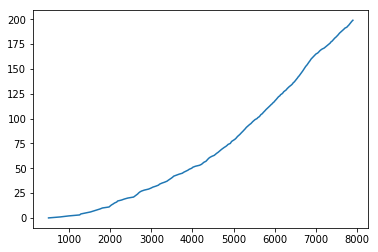

In [52]:
e = Env()
agent = Agent(e)
total_steps = 0
steps_array = []
for i in range(200):
    steps = agent.train_episode()
    total_steps += steps
    steps_array.append(total_steps)
    print(i, steps)
import matplotlib.pyplot as plt
plt.plot(steps_array, list(range(len(steps_array))))
plt.show()